<a href="https://colab.research.google.com/github/ronil1508/SOC-2022_QML/blob/main/Deutsch_Jozsa_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
!pip install qiskit


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
from qiskit import QuantumCircuit, assemble, Aer
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_vector, array_to_latex, plot_bloch_multivector
from math import sqrt, pi
from IPython.display import display, Math

In [54]:
function = 'balanced'
n = 4

In [55]:
constant_oracle = QuantumCircuit(n + 1)
random_bit = np.random.randint(2)
if random_bit == 1:
    constant_oracle.x(n)

In [56]:
balanced_oracle = QuantumCircuit(n + 1)
random_num = np.random.randint(1,2**n)
random_str =  format(random_num,'0' + str(n) +'b')
for i in range(n):
    if random_str[i] == "1":
        balanced_oracle.x(i)
for i in range(n):
    balanced_oracle.cx(i, n)
for i in range(n):
    if random_str[i] == "1":
        balanced_oracle.x(i)


In [57]:
constant_oracle.draw(initial_state =True)

q_0: |0>
        
q_1: |0>
        
q_2: |0>
        
q_3: |0>
        
q_4: |0>

In [58]:
balanced_oracle.draw(initial_state =True)

q_0: |0>───────■──────────────────────
               │                      
q_1: |0>───────┼────■─────────────────
               │    │                 
q_2: |0>───────┼────┼────■────────────
        ┌───┐  │    │    │       ┌───┐
q_3: |0>┤ X ├──┼────┼────┼────■──┤ X ├
        └───┘┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐└───┘
q_4: |0>─────┤ X ├┤ X ├┤ X ├┤ X ├─────
             └───┘└───┘└───┘└───┘

In [59]:
qc = QuantumCircuit(n+1,n)
qc.x(n)
for j in range(0,n+1):
    qc.h(j)
qc.draw(initial_state =True)

┌───┐     
q_0: |0>┤ H ├─────
        ├───┤     
q_1: |0>┤ H ├─────
        ├───┤     
q_2: |0>┤ H ├─────
        ├───┤     
q_3: |0>┤ H ├─────
        ├───┤┌───┐
q_4: |0>┤ X ├┤ H ├
        └───┘└───┘
 c: 0 4/══════════

In [60]:
qc.barrier()
if function == 'balanced':
    qc = qc.compose(balanced_oracle)
else:
    qc = qc.compose(constant_oracle)
qc.barrier()
for i in range(n):
    qc.h(i)
for i in range(n):
    qc.measure(i, i)
qc.draw()

┌───┐      ░                                ░ ┌───┐┌─┐         
q_0: ┤ H ├──────░────────■───────────────────────░─┤ H ├┤M├─────────
     ├───┤      ░        │                       ░ ├───┤└╥┘┌─┐      
q_1: ┤ H ├──────░────────┼────■──────────────────░─┤ H ├─╫─┤M├──────
     ├───┤      ░        │    │                  ░ ├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├──────░────────┼────┼────■─────────────░─┤ H ├─╫──╫─┤M├───
     ├───┤      ░ ┌───┐  │    │    │       ┌───┐ ░ ├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├──────░─┤ X ├──┼────┼────┼────■──┤ X ├─░─┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐ ░ └───┘┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐└───┘ ░ └───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├─░──────┤ X ├┤ X ├┤ X ├┤ X ├──────░───────╫──╫──╫──╫─
     └───┘└───┘ ░      └───┘└───┘└───┘└───┘      ░       ║  ║  ║  ║ 
c: 4/════════════════════════════════════════════════════╩══╩══╩══╩═
                                                         0  1  2  3

In [61]:
qc_sim = Aer.get_backend('aer_simulator')

{'1111': 1024}


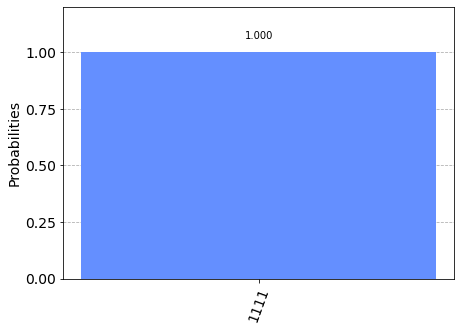

In [62]:
counts = qc_sim.run(assemble(qc)).result().get_counts()
print(counts)
plot_histogram(counts) 